In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("../data/datos_limpios.csv")
#veamos cuantas dimensiones y registros contiene
data.shape
data.head()

,Unnamed: 0,Unnamed: 0.1,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,1995,7129300520,2014-10-13,3,1.00,1180,5650,1.0,3,...,1180,1995,1955,1995,98178,47.5112,-122.257,1340,5650,221900
1,1,1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,2,5631500400,2015-02-25,2,1.00,770,10000,1.0,3,...,770,1995,1933,1995,98028,47.7379,-122.233,2720,8062,180000
3,3,3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,5,...,1050,910,1965,1995,98136,47.5208,-122.393,1360,5000,604000
4,4,4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,3,...,1680,1995,1987,1995,98074,47.6168,-122.045,1800,7503,510000


In [3]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,10798.000000,10798.092374,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1502.747372,1970.999676,1995.035005,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,6234.661218,6234.516003,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,662.426946,29.375234,3.194848,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,0.000000,1.000000,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,10.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,5399.000000,5399.000000,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,840.000000,1951.000000,1995.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,10798.000000,10798.000000,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1995.000000,1975.000000,1995.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,16197.000000,16197.000000,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1995.000000,1997.000000,1995.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,21596.000000,21596.000000,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


C:\Users\cbocc\AppData\Local\Temp/ipykernel_7788/3269597097.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Unnamed: 0','Unnamed: 0.1', 'id', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement', 'lat', 'long', 'sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_lot15', '' 'sqft_above'],1).hist()


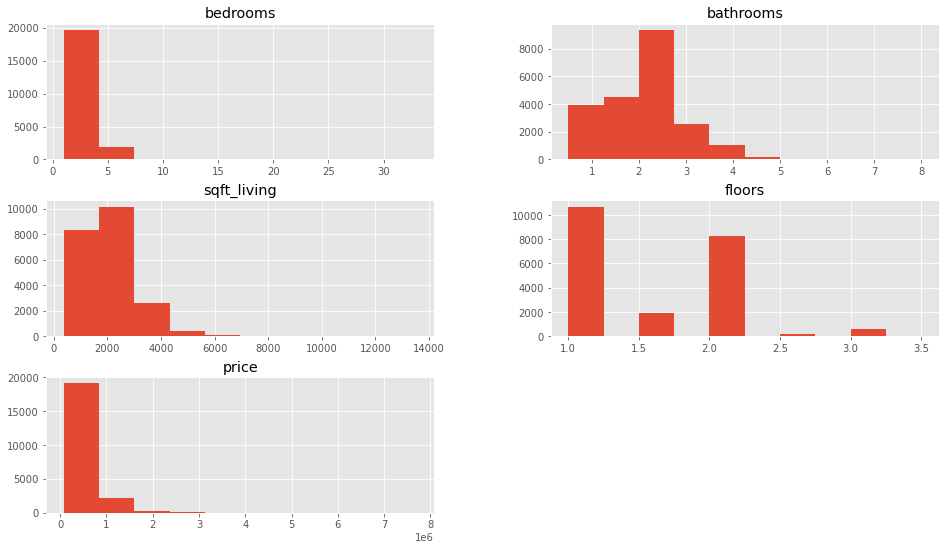

In [6]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Unnamed: 0','Unnamed: 0.1', 'id', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement', 'lat', 'long', 'sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_lot15', '' 'sqft_above'],1).hist()
plt.show()

In [8]:
filtered_data = data[(data['price'] <= 1500000) & (data['sqft_living'] <= 3000)]

suma = (filtered_data["bathrooms"] + filtered_data['floors'].fillna(0) + filtered_data['bedrooms'])

dataX2 =  pd.DataFrame()
dataX2["sqft_living"] = filtered_data["sqft_living"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['price'].values

In [9]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [  193.41400133 -6523.99108789]
Mean squared error: 30537709782.74
Variance score: 0.26


C:\Users\cbocc\AppData\Local\Temp/ipykernel_7788/971571598.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Regresión lineal precio de las casas')

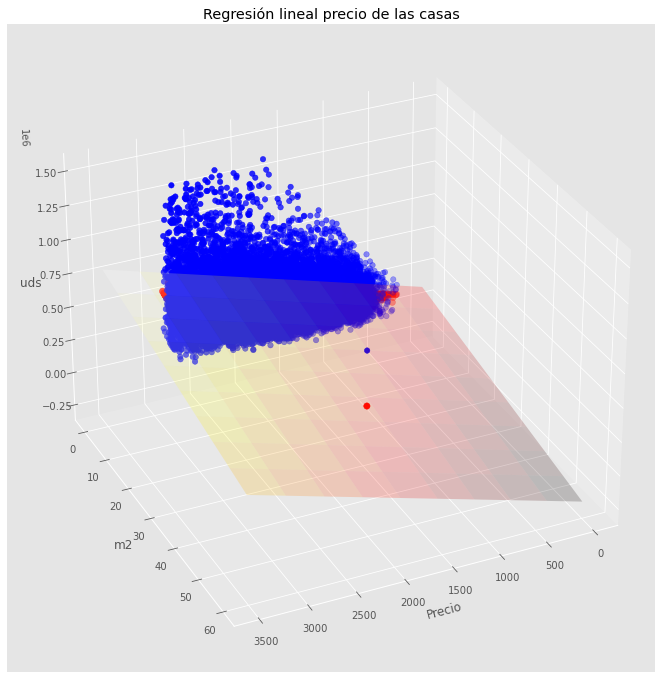

In [10]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Precio')
ax.set_ylabel('m2')
ax.set_zlabel('uds')
ax.set_title('Regresión lineal precio de las casas')

In [15]:
prediccion = regr2.predict([[2080, 3+2+4]])
print(int(prediccion))

492572


In [16]:
prediccion2 = regr2.predict([[4000, 4+3+5]])
print(int(prediccion2))

844355
